In [1]:
%env MISTRAL_API_KEY=ZL4LdkeCwsoIYcNx2aFDujTYgpwj2kij
import os
import base64
from mistralai import Mistral

# Load Mistral API key from environment variables
api_key = os.environ["MISTRAL_API_KEY"]

# Model specification
model = "mistral-large-latest"

# Initialize the Mistral client
client = Mistral(api_key=api_key)

env: MISTRAL_API_KEY=ZL4LdkeCwsoIYcNx2aFDujTYgpwj2kij


In [56]:
def img_to_base64(image_path):
    """Input : image_path (str) : path to the image file
    Returns : image_base64 (str) : base64 encoded image"""
    
    with open(image_path, 'rb') as image_file:
        image_bytes = image_file.read()

    image_base64 = base64.b64encode(image_bytes).decode('utf-8')
    
    return image_base64

def list_clothes(image_base64): 
    # Define the messages for the chat API
    messages = [
        {
            "role": "system",
            "content": "Return the answer in a JSON object with the next structure: "
                    "{\"elements\": [{\"element\": \"some name of element1\", "
                    "\"color\": \"the color of element1\", "
                    "\"fit\": \"the fit of element1 (baggy, slim...)\", "
                    "\"price\": \"some number, estimated price of element1\", "
                    "\"context\": \"one word form this list : casual, formal, athletic, office-ready, streetwear, fashion, luxury\", "
                    "\"description\": \"a description of element1, emphasizing on the vibe of the piece\"}, "
                    "{\"element\": \"some name of element2\", ...}]}"
        },
        {
            "role": "user",
            "content": "Describe each clothing piece that this person is wearing using keywords."
        },
        {
            "role": "user",
            "content": [
                {
                    "type": "image_url",
                    "image_url": f"data:image/jpeg;base64,{image_base64}"
                }
            ]
        }
    ]

    # Call the Mistral API to complete the chat
    chat_response = client.chat.complete(
        model="pixtral-12b-2409",
        messages=messages,
        response_format={
            "type": "json_object",
        }
    )

    # Get the content of the response
    content = chat_response.choices[0].message.content
    
    return content

empty_element = {"element":None, "color":None, "fit":None, "price":None, "context":None, "description":None}

def recommend_from_image(image_base64, description=None, element = empty_element):
    # Define the messages for the chat API
    messages = [
        {
            "role": "system",
            "content": "Return the answer in a JSON object with the next structure: "
                    "{\"element\": \"a clothing piece that is not in the original image\", "
                    "\"color\": \"color of this piece\", "
                    "\"fit\": \"fit of this piexe (baggy, slim...)\", "
                    "\"price\": \"some number, estimated price of the piece\", "
                    "\"context\": \"one word from this list : casual, formal, athletic, office-ready, streetwear, fashion, luxury\", "
                    "\"description\": \"a short description of the recommended piece\"}"
        },
        {
            "role": "user",
            "content": "Describe a single clothing piece following the Requirements that fit the reference image."
                    "If not precised, keep in mind the color scheme and general vibe of the reference image."
        },
        {
            "role": "user",
            "content": f"Requirements: element: {element['element']}, color: {element['color']}, fit: {element['fit']}, price: {element['price']}, context: {element['context']}, description: {element['description']}."
        },
        {
            "role": "user",
            "content": [
                {
                    "type": "image_url",
                    "image_url": f"data:image/jpeg;base64,{image_base64}"
                }
            ]
        }
    ]

    # Call the Mistral API to complete the chat
    chat_response = client.chat.complete(
        model="pixtral-12b-2409",
        messages=messages,
        response_format={
            "type": "json_object",
        }
    )

    # Get the content of the response
    content = chat_response.choices[0].message.content
    
    return content

def recommend_from_wardrobe(wardrobe, element = empty_element):
    # Define the messages for the chat API
    messages = [
        {
            "role": "system",
            "content": "Return the answer in a JSON object with the next structure: "
                    "{\"element\": \"a clothing piece that is not in the wardrobe\", "
                    "\"color\": \"color of this piece\", "
                    "\"fit\": \"fit of this piexe (baggy, slim...)\", "
                    "\"price\": \"some number, estimated price of the piece\", "
                    "\"context\": \"one word from this list : casual, formal, athletic, office-ready, streetwear, fashion, luxury\", "
                    "\"description\": \"a short description of the recommended piece\"}"
        },
        {
            "role": "user",
            "content": "Describe a single clothing piece following the Requirements that fit in my wardrobe, while not already being in it."
        },
        {
            "role": "user",
            "content": f"Requirements: element: {element['element']}, color: {element['color']}, fit: {element['fit']}, price: {element['price']}, context: {element['context']}, description: {element['description']}."
        },
        {
            "role": "user",
            "content": f"I have these elements in my wardrobe: {[wardrobe[i]['description'] for i in range(len(wardrobe))]}."
        }
    ]

    # Call the Mistral API to complete the chat
    chat_response = client.chat.complete(
        model="mistral-large-latest",
        messages=messages,
        response_format={
            "type": "json_object",
        }
    )

    # Get the content of the response
    content = chat_response.choices[0].message.content
    
    return content

In [3]:
import matplotlib.pyplot as plt

{"elements": [
    {
        "element": "sports bra",
        "color": "green",
        "fit": "slim",
        "price": "25",
        "context": "athletic",
        "description": "A supportive and comfortable green sports bra, perfect for high-impact workouts and running."
    },
    {
        "element": "leggings",
        "color": "black",
        "fit": "form-fitting",
        "price": "30",
        "context": "athletic",
        "description": "Stylish and functional black leggings designed for comfort and flexibility during exercise."
    },
    {
        "element": "running shoes",
        "color": "black and pink",
        "fit": "snug",
        "price": "60",
        "context": "athletic",
        "description": "Black and pink running shoes with good cushioning and grip, ideal for running and various sports activities."
    }
]}


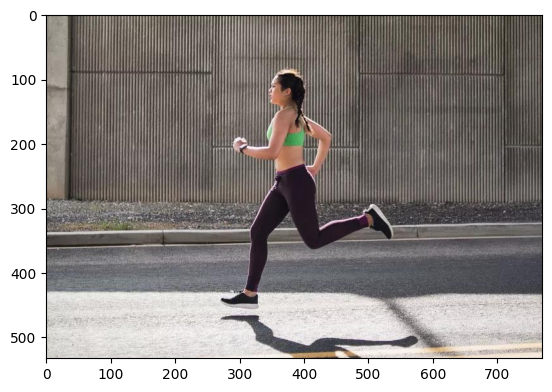

In [57]:
img_path = "test_images/img6.jpg"
plt.imshow(plt.imread(img_path))

img_64 = img_to_base64(img_path)
clothes = list_clothes(img_64)
print(clothes)

In [55]:
element = {"element":None, "color":None, "fit":None, "price":None, "context":None, "description":None}
print(recommend_from_image(img_64, element=element))
print(recommend_from_wardrobe(clothes, element=element))

{"element": "a sleeveless athletic top",
 "color": "bright neon green",
 "fit": "form-fitting",
 "price": "45",
 "context": "athletic",
 "description": "A vibrant and form-fitting sleeveless top designed for high-intensity workouts, perfect for adding a pop of color to your athletic gear."}
{
  "element": "hoodie",
  "color": "gray",
  "fit": "regular",
  "price": 50,
  "context": "casual",
  "description": "A comfortable gray hoodie with a relaxed fit, perfect for casual outings or lounging, offering a balance between style and coziness."
}
